In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [8]:
AD_data = pd.read_csv('Data/AD_LVDT_01mm_06192023_134725.csv')
AD_data

,Time (sec),S:Load (lbs),S:HL1 (DIM),S:LVDT (in),S:Position (in),Ch:Position (mm),Ch:Load (N),Ch:Stress (MPa),Ch:Strain (mm/mm),Ch:HL1 (DIM),Set Point (),Cycles ()
0,0.010000,-0.011544,-1294.618042,-0.000043,-0.000000,-0.000000,-0.051348,-0.002616,-0.000000,-1294.618042,0.000208,0.0
1,0.020000,-0.006703,-1294.618042,-0.000207,-0.000000,-0.000000,-0.029815,-0.001519,-0.000000,-1294.618042,0.000208,0.0
2,0.030000,-0.001489,-1294.618042,-0.000151,-0.000000,-0.000000,-0.006625,-0.000338,-0.000000,-1294.618042,0.000208,0.0
3,0.040000,-0.010426,-1294.618042,-0.000229,-0.000000,-0.000000,-0.046379,-0.002363,-0.000000,-1294.618042,0.000208,0.0
4,0.050000,-0.015267,-1294.573608,-0.000172,-0.000000,-0.000000,-0.067912,-0.003460,-0.000000,-1294.573608,0.000208,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9615,96.160004,0.187676,-1295.641113,0.038015,0.000001,0.000034,0.834824,0.042528,0.000341,-1295.641113,-0.000000,0.0
9616,96.170006,0.186559,-1295.641113,0.037920,0.000001,0.000034,0.829854,0.042275,0.000341,-1295.641113,-0.000000,0.0
9617,96.180008,0.189165,-1295.596680,0.038053,0.000001,0.000034,0.841449,0.042865,0.000341,-1295.596680,-0.000000,0.0
9618,96.190002,0.186186,-1295.641113,0.037954,0.000001,0.000034,0.828198,0.042190,0.000341,-1295.641113,-0.000000,0.0


In [53]:
AD_denoised_data = pd.read_csv('Data/AD Membrane New Dongle_07172023_135247.csv')

In [56]:
AD_denoised_500N_data = pd.read_csv('Data/AD Membrane New Dongle 500N_07172023_140036.csv')

# Plot Load vs LVDT

(0.035, 0.04)

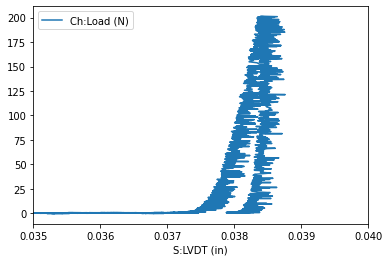

In [9]:
# plot Ch:Load (N) vs. S:LVDT (in)
AD_data.plot(x='S:LVDT (in)', y='Ch:Load (N)')
# only show 0.035 to 0.040 in
plt.xlim(0.035, 0.040)

(0.061, 0.0635)

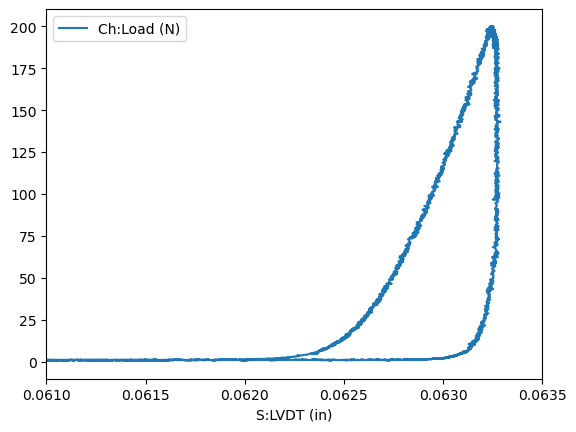

In [8]:
# plot Ch:Load (N) vs. S:LVDT (in)
AD_denoised_data.plot(x='S:LVDT (in)', y='Ch:Load (N)')
# only show 0.035 to 0.040 in
plt.xlim(0.061, 0.0635)

(0.061, 0.064)

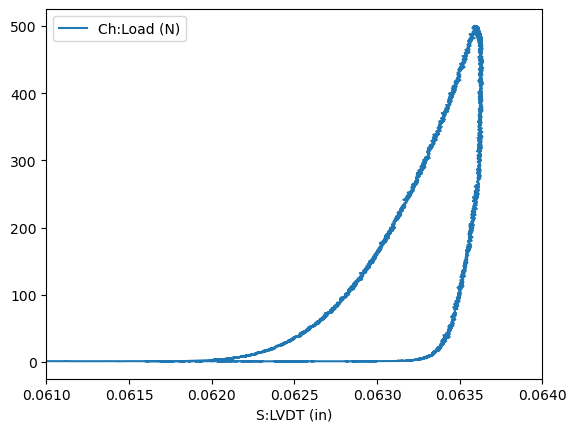

In [59]:
# plot Ch:Load (N) vs. S:LVDT (in)
AD_denoised_500N_data.plot(x='S:LVDT (in)', y='Ch:Load (N)')
# only show 0.035 to 0.040 in
plt.xlim(0.061, 0.064)

# Denoise

(0.061, 0.0635)

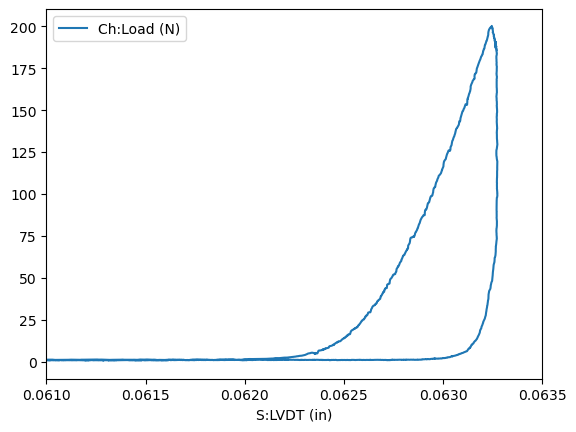

In [9]:
# denoise the data on S:LVDT (in)
from scipy.signal import savgol_filter
AD_denoised_data['S:LVDT (in)'] = savgol_filter(AD_denoised_data['S:LVDT (in)'], 51, 3)

# plot Ch:Load (N) vs. S:LVDT (in)
AD_denoised_data.plot(x='S:LVDT (in)', y='Ch:Load (N)')
plt.xlim(0.061, 0.0635)


(0.035, 0.04)

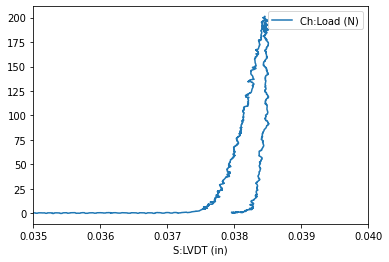

In [10]:
# denoise the data on S:LVDT (in)
from scipy.signal import savgol_filter
AD_data['S:LVDT (in)'] = savgol_filter(AD_data['S:LVDT (in)'], 51, 3)

# plot Ch:Load (N) vs. S:LVDT (in)
AD_data.plot(x='S:LVDT (in)', y='Ch:Load (N)')
# only show 0.035 to 0.040 in
plt.xlim(0.035, 0.040)


In [11]:
# calculate the running average of the S:LVDT (in) and add it to the dataframe
AD_data['S:LVDT (in) running average'] = AD_data['S:LVDT (in)'].rolling(window=20).mean()
AD_data

,Time (sec),S:Load (lbs),S:HL1 (DIM),S:LVDT (in),S:Position (in),Ch:Position (mm),Ch:Load (N),Ch:Stress (MPa),Ch:Strain (mm/mm),Ch:HL1 (DIM),Set Point (),Cycles (),S:LVDT (in) running average
0,0.010000,-0.011544,-1294.618042,-0.000170,-0.000000,-0.000000,-0.051348,-0.002616,-0.000000,-1294.618042,0.000208,0.0,NaN
1,0.020000,-0.006703,-1294.618042,-0.000156,-0.000000,-0.000000,-0.029815,-0.001519,-0.000000,-1294.618042,0.000208,0.0,NaN
2,0.030000,-0.001489,-1294.618042,-0.000143,-0.000000,-0.000000,-0.006625,-0.000338,-0.000000,-1294.618042,0.000208,0.0,NaN
3,0.040000,-0.010426,-1294.618042,-0.000132,-0.000000,-0.000000,-0.046379,-0.002363,-0.000000,-1294.618042,0.000208,0.0,NaN
4,0.050000,-0.015267,-1294.573608,-0.000121,-0.000000,-0.000000,-0.067912,-0.003460,-0.000000,-1294.573608,0.000208,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9615,96.160004,0.187676,-1295.641113,0.037987,0.000001,0.000034,0.834824,0.042528,0.000341,-1295.641113,-0.000000,0.0,0.037991
9616,96.170006,0.186559,-1295.641113,0.037982,0.000001,0.000034,0.829854,0.042275,0.000341,-1295.641113,-0.000000,0.0,0.037992
9617,96.180008,0.189165,-1295.596680,0.037976,0.000001,0.000034,0.841449,0.042865,0.000341,-1295.596680,-0.000000,0.0,0.037992
9618,96.190002,0.186186,-1295.641113,0.037969,0.000001,0.000034,0.828198,0.042190,0.000341,-1295.641113,-0.000000,0.0,0.037991


(0.035, 0.04)

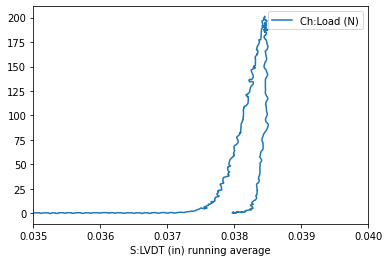

In [12]:
# plot Ch:Load (N) vs. S:LVDT (in) running average
AD_data.plot(x='S:LVDT (in) running average', y='Ch:Load (N)')
# only show 0.035 to 0.040 in
plt.xlim(0.035, 0.040)

# Trying to use time to define position

<AxesSubplot:xlabel='Position (mm)'>

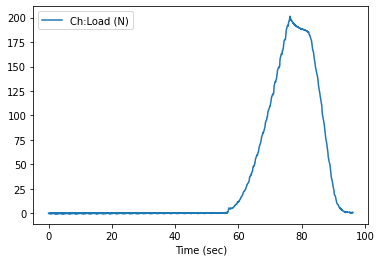

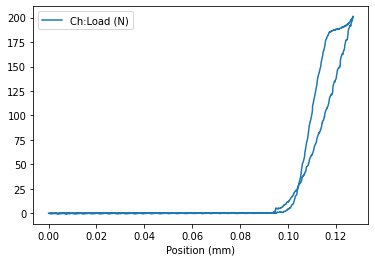

In [13]:
# plot Ch:Load (N) vs. Time (sec)
AD_data.plot(x='Time (sec)', y='Ch:Load (N)')
# find the index of the maximum load
load_idxmax = AD_data['Ch:Load (N)'].idxmax()
# create a column that calculates the position based on Time (sec) at the rate of 0.1 mm/min until the maximum load
AD_data['Position (mm)'] = np.where(AD_data.index <= load_idxmax, AD_data['Time (sec)']*0.1/60, np.nan)
# continue to calculate the position based on Time (sec) at the rate of -0.1 mm/min after the maximum load
AD_data['Position (mm)'] = np.where(AD_data.index > load_idxmax, (AD_data['Time (sec)']-AD_data['Time (sec)'][load_idxmax])*-0.1/60+AD_data['Position (mm)'][load_idxmax], AD_data['Position (mm)'])
# plot Ch:Load (N) vs. Position (mm)
AD_data.plot(x='Position (mm)', y='Ch:Load (N)')

# Trying to seperate compression and recovery

In [47]:
AD_denoised_data = pd.read_csv('Data/AD Membrane New Dongle_07172023_135247.csv')
# discard the data before 0.061 in and after 0.0635 in in S:LVDT (in)
AD_denoised_data = AD_denoised_data[AD_denoised_data['S:LVDT (in)'] >= 0.061]
AD_denoised_data = AD_denoised_data[AD_denoised_data['S:LVDT (in)'] <= 0.0635]

(0.061, 0.0635)

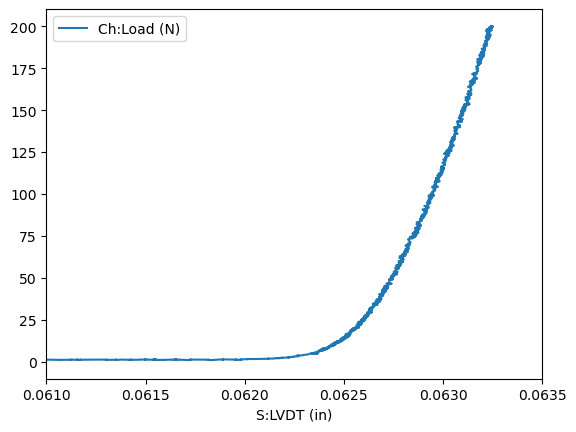

In [69]:
# find where the Ch:Load (N) is at a maximum
load_idxmax = AD_denoised_data['Ch:Load (N)'].idxmax()
# keep the data before the maximum load
AD_denoised_data = AD_denoised_data[AD_denoised_data.index <= load_idxmax]
# plot Ch:Load (N) vs. S:LVDT (in)
AD_denoised_data.plot(x='S:LVDT (in)', y='Ch:Load (N)')
# only show 0.061 to 0.0635 in
plt.xlim(0.061, 0.0635)


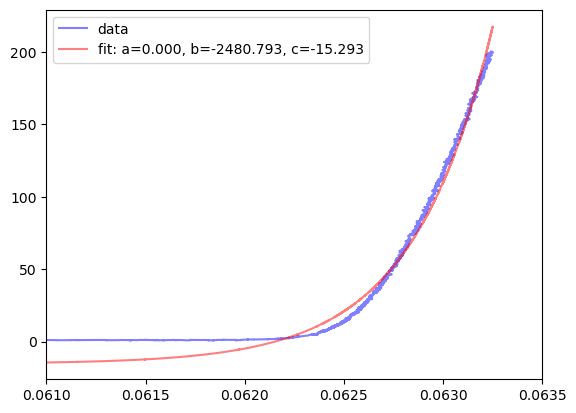

In [49]:
# fit an exponential curve to the data
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a*np.exp(-b*x)+c

popt, pcov = curve_fit(func, AD_denoised_data['S:LVDT (in)'], AD_denoised_data['Ch:Load (N)'], maxfev=100000)
# plot the data and the fitted curve on the same plot from 0.061 to 0.0635 in
plt.plot(AD_denoised_data['S:LVDT (in)'], AD_denoised_data['Ch:Load (N)'], 'b-', label='data', alpha=0.5)
plt.plot(AD_denoised_data['S:LVDT (in)'], func(AD_denoised_data['S:LVDT (in)'], *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt), alpha=0.5)
plt.xlim(0.061, 0.0635)
plt.legend()
plt.show()


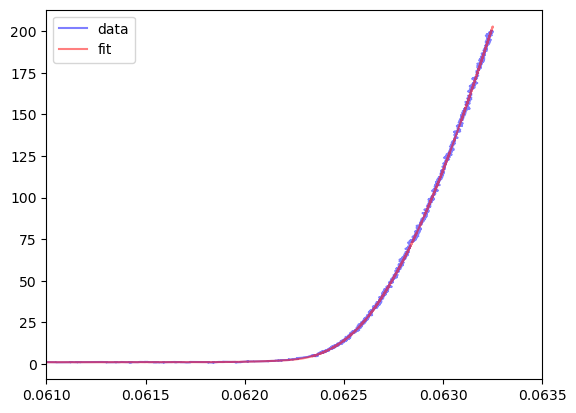

In [39]:
# fit a generalized additive model to the data
from pygam import LinearGAM
gam = LinearGAM().fit(AD_denoised_data['S:LVDT (in)'], AD_denoised_data['Ch:Load (N)'])
# plot the data and the fitted curve on the same plot from 0.061 to 0.0635 in
plt.plot(AD_denoised_data['S:LVDT (in)'], AD_denoised_data['Ch:Load (N)'], 'b-', label='data', alpha=0.5)
plt.plot(AD_denoised_data['S:LVDT (in)'], gam.predict(AD_denoised_data['S:LVDT (in)']), 'r-', label='fit', alpha=0.5)
plt.xlim(0.061, 0.0635)
plt.legend()
plt.show()


<AxesSubplot: xlabel='S:LVDT (in)'>

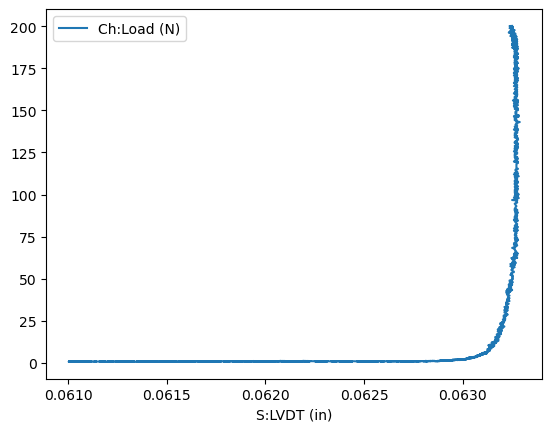

In [44]:
AD_denoised_data = pd.read_csv('Data/AD Membrane New Dongle_07172023_135247.csv')
# discard the data before 0.061 in and after 0.0635 in in S:LVDT (in)
AD_denoised_data = AD_denoised_data[AD_denoised_data['S:LVDT (in)'] >= 0.061]
AD_denoised_data = AD_denoised_data[AD_denoised_data['S:LVDT (in)'] <= 0.0635]

# find where the Ch:Load (N) is at a maximum
load_idxmax = AD_denoised_data['Ch:Load (N)'].idxmax()
# keep the data after the maximum load
AD_denoised_data = AD_denoised_data[AD_denoised_data.index > load_idxmax]
# reset the index
AD_denoised_data = AD_denoised_data.reset_index(drop=True)
# plot Ch:Load (N) vs. S:LVDT (in)
AD_denoised_data.plot(x='S:LVDT (in)', y='Ch:Load (N)')

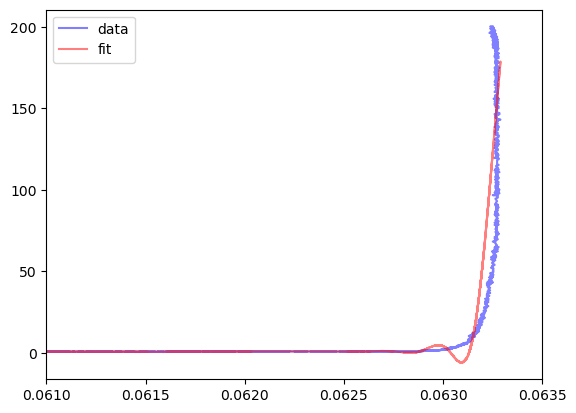

In [45]:
# fit a generalized additive model to the data
from pygam import LinearGAM
gam = LinearGAM().fit(AD_denoised_data['S:LVDT (in)'], AD_denoised_data['Ch:Load (N)'])
# plot the data and the fitted curve on the same plot from 0.061 to 0.0635 in
plt.plot(AD_denoised_data['S:LVDT (in)'], AD_denoised_data['Ch:Load (N)'], 'b-', label='data', alpha=0.5)
plt.plot(AD_denoised_data['S:LVDT (in)'], gam.predict(AD_denoised_data['S:LVDT (in)']), 'r-', label='fit', alpha=0.5)
plt.xlim(0.061, 0.0635)
plt.legend()
plt.show()


In [14]:
# find where the Ch:Load (N) is at a maximum
load_idxmax = AD_data['Ch:Load (N)'].idxmax()
# keep the data after the maximum
AD_data = AD_data[AD_data.index > load_idxmax]
AD_data

,Time (sec),S:Load (lbs),S:HL1 (DIM),S:LVDT (in),S:Position (in),Ch:Position (mm),Ch:Load (N),Ch:Stress (MPa),Ch:Strain (mm/mm),Ch:HL1 (DIM),Set Point (),Cycles (),S:LVDT (in) running average,Position (mm)
7627,76.280006,45.232456,-1295.507690,0.038455,0.001183,0.030057,201.204010,10.249821,0.300574,-1295.507690,0.030387,0.0,0.038456,0.127100
7628,76.290001,45.169525,-1295.552124,0.038453,0.001182,0.030032,200.924088,10.235560,0.300316,-1295.552124,0.030387,0.0,0.038456,0.127083
7629,76.300003,45.109573,-1295.507690,0.038451,0.001182,0.030032,200.657410,10.221975,0.300316,-1295.507690,0.030387,0.0,0.038455,0.127067
7630,76.310005,45.082764,-1295.552124,0.038447,0.001182,0.030032,200.538147,10.215900,0.300316,-1295.552124,0.030387,0.0,0.038455,0.127050
7631,76.320007,45.062653,-1295.552124,0.038447,0.001182,0.030032,200.448685,10.211343,0.300316,-1295.552124,0.030387,0.0,0.038454,0.127033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9615,96.160004,0.187676,-1295.641113,0.037987,0.000001,0.000034,0.834824,0.042528,0.000341,-1295.641113,-0.000000,0.0,0.037991,0.093967
9616,96.170006,0.186559,-1295.641113,0.037982,0.000001,0.000034,0.829854,0.042275,0.000341,-1295.641113,-0.000000,0.0,0.037992,0.093950
9617,96.180008,0.189165,-1295.596680,0.037976,0.000001,0.000034,0.841449,0.042865,0.000341,-1295.596680,-0.000000,0.0,0.037992,0.093933
9618,96.190002,0.186186,-1295.641113,0.037969,0.000001,0.000034,0.828198,0.042190,0.000341,-1295.641113,-0.000000,0.0,0.037991,0.093917


(0.035, 0.04)

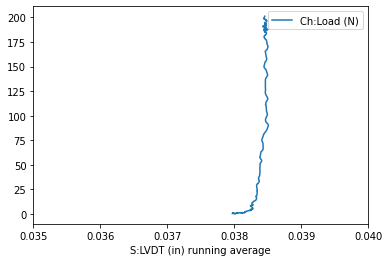

In [15]:
# plot Ch:Load (N) vs. S:LVDT (in) running average
AD_data.plot(x='S:LVDT (in) running average', y='Ch:Load (N)')
# only show 0.035 to 0.040 in
plt.xlim(0.035, 0.040)

In [16]:
# reverse the data order
AD_data = AD_data.iloc[::-1]
AD_data

,Time (sec),S:Load (lbs),S:HL1 (DIM),S:LVDT (in),S:Position (in),Ch:Position (mm),Ch:Load (N),Ch:Stress (MPa),Ch:Strain (mm/mm),Ch:HL1 (DIM),Set Point (),Cycles (),S:LVDT (in) running average,Position (mm)
9619,96.200005,0.199964,-1295.685669,0.037962,0.000002,0.000043,0.889485,0.045313,0.000431,-1295.685669,-0.000000,0.0,0.037990,0.093900
9618,96.190002,0.186186,-1295.641113,0.037969,0.000001,0.000034,0.828198,0.042190,0.000341,-1295.641113,-0.000000,0.0,0.037991,0.093917
9617,96.180008,0.189165,-1295.596680,0.037976,0.000001,0.000034,0.841449,0.042865,0.000341,-1295.596680,-0.000000,0.0,0.037992,0.093933
9616,96.170006,0.186559,-1295.641113,0.037982,0.000001,0.000034,0.829854,0.042275,0.000341,-1295.641113,-0.000000,0.0,0.037992,0.093950
9615,96.160004,0.187676,-1295.641113,0.037987,0.000001,0.000034,0.834824,0.042528,0.000341,-1295.641113,-0.000000,0.0,0.037991,0.093967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7631,76.320007,45.062653,-1295.552124,0.038447,0.001182,0.030032,200.448685,10.211343,0.300316,-1295.552124,0.030387,0.0,0.038454,0.127033
7630,76.310005,45.082764,-1295.552124,0.038447,0.001182,0.030032,200.538147,10.215900,0.300316,-1295.552124,0.030387,0.0,0.038455,0.127050
7629,76.300003,45.109573,-1295.507690,0.038451,0.001182,0.030032,200.657410,10.221975,0.300316,-1295.507690,0.030387,0.0,0.038455,0.127067
7628,76.290001,45.169525,-1295.552124,0.038453,0.001182,0.030032,200.924088,10.235560,0.300316,-1295.552124,0.030387,0.0,0.038456,0.127083


(0.035, 0.04)

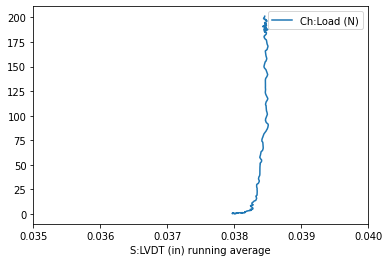

In [17]:
# plot Ch:Load (N) vs. S:LVDT (in) running average
AD_data.plot(x='S:LVDT (in) running average', y='Ch:Load (N)')
# only show 0.035 to 0.040 in
plt.xlim(0.035, 0.040)

# Working on the PP data

In [18]:
pp_data = pd.read_csv('Data/PP_LVDT_01mm_2_06192023_135627.csv')

(0.03, 0.038)

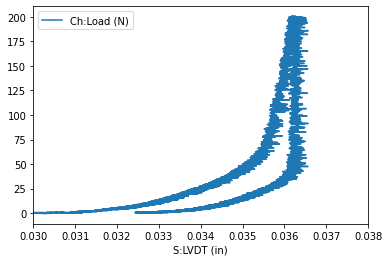

In [19]:
# plot Ch:Load (N) vs. S:LVDT (in)
pp_data.plot(x='S:LVDT (in)', y='Ch:Load (N)')
# only show 0.03 to 0.038 in
plt.xlim(0.03, 0.038)

(0.03, 0.038)

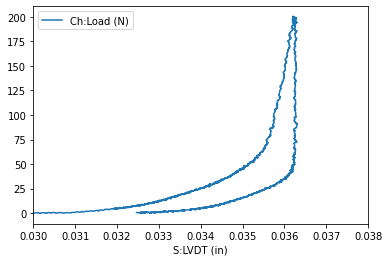

In [20]:
# denoise the data on S:LVDT (in)
from scipy.signal import savgol_filter
pp_data['S:LVDT (in)'] = savgol_filter(pp_data['S:LVDT (in)'], 51, 3)

# plot Ch:Load (N) vs. S:LVDT (in)
pp_data.plot(x='S:LVDT (in)', y='Ch:Load (N)')
# only show 0.03 to 0.038 in
plt.xlim(0.03, 0.038)

# Curve fit?